In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def prepare_matrices(dataframe):
    '''
    This function prepares x matrix (by adding a dummy feature, x0) and y matrix.
    Dummy feature: Feature whose value is 1
    
    Arguements:
    dataframe: Dataframe (train / test), the last row of which is 'y', 
    
    Returns:
    x: Feature Matrix (numpy matrix of shape (m, n), m = number of train / test set examples)
        n = number of features (# of feature columns of dataframe + 1)
    y = Output Vector / Target Vector (numpy matrix of shape (m, 1), m = number of train / test set examples)
    '''
    m = len(dataframe)
    y = dataframe['y'].to_numpy()
    y = y.reshape((m, 1))
    x_dataframe = dataframe.drop('y', axis = 1)
    x_1 = x_dataframe.to_numpy()
    x_0 = np.ones(shape = (m, 1))
    x = np.concatenate((x_0, x_1), axis = 1)
    return x, y

In [3]:
def initialize_parameter_matrix(n, method = 'zeros'):
    '''
    This function initializes parameter matrix.
    
    Arguements:
    n: Number of features (This include dummy featue x0)
    method: zeros / random. The method used to initialize paramter matrix.
    (default: 'zeros', i.e. initialization with zeros)
    
    Returns:
    theta: Parameter matrix of shape (n, 1), n = number of features 
    '''
    if method == 'zeros':
        theta = np.zeros(shape = (n, 1))
    elif method == 'random':
        theta = np.random.rand(n, 1)
    
    return theta

In [4]:
def hypothesis_calc(theta, x):
    '''
    This function calculates hypothesis matrix.
    
    Arguements:
    theta: Parameter matrix of shape (n, 1), n = number of features
    x: Feature matrix of shape (m, n), m = number of training examples
    
    Returns:
    h: Calculated hypothesis matrix of shape (m, 1)
    '''
    h = np.sum(np.transpose(theta) * x, axis = 1)
    m = x.shape[0]
    h = h.reshape((m, 1))
    return h

In [5]:
def cost_calc(h, y):
    '''
    This function calculates cost.
    
    Arguements:
    h: Hypothesis matrix of shape (m, 1), m = number of training examples
    y: Output matrix of shape (m, 1)
    
    Returns:
    cost: Calculated cost based on hypothesis (h) and output matrix (y)
    '''
    cost = 0.5 * np.nansum(np.square((h-y)))
    return cost

In [6]:
def update_gradients(y, h, x, theta, learning_rate):
    '''
    This function updates parameter matrix using batch gradient descent algorithm.
    
    Arguements:
    y: Output matrix of shape (m, 1), m = number of training examples
    h: Hypothesis matrix of shape (m, 1)
    x: Feature matrix of shape (m, n), m = number of training examples, n = number of features
    theta: Parameter matrix of shape (n, 1)
    learning_rate: Value of learning rate to be used to update parameter matrix
    
    Returns:
    theta: Updated parameter matrix of shape (n, 1)
    '''    
    int_term = np.nansum(np.multiply((y - h), x), axis = 0)
    n = x.shape[1]
    int_term = int_term.reshape((n,1))
    theta = theta + (learning_rate * int_term)
    return theta

In [7]:
def convergence_check(costs, epsilon):
    '''
    This function checks convergence of gradient descent algorithm.
    
    Arguements:
    costs: A list containing cost values of current and previous iterations
    epsilon: Threshold of square error difference between costs of consecutive iterations used to
    decide convergence of gradient descent algorithm
    
    Returns:
    Boolean (True / False) value of whether algorithm has been converged
    '''
    error = (costs[0] - costs[1]) ** 2
    return error < epsilon

In [8]:
def linear_regression_grad_descent(x, y, num_iterations = 50000, grad_desc_type = 'batch', 
                                   learning_rate = 0.01, epsilon = 1e-04, verbose = True, initialization = 'zeros'):
    '''
    This function performs linear regression using gradient descent algorithm for minimising cost.
    
    Arguements:
    x: Feature matrix of shape (m, n), m = number of training examples, n = number of features
    y: Output matrix of shape (m, 1)
    num_iterations (optional): Max number of iterations (default value: 50000) (if convergence is acheived before this number,
    algorithm will be stopped)
    learning_rate (optional): Value for learning rate (default value: 0.01)
    epsilon (optional): Threshold of square error difference between costs of consecutive iterations used to
    decide convergence of gradient descent algorithm (default value = 1e-04)
    verbose (optional): Boolean value which decide whether the output of the algorithm will be verbose
    initialization (optional): 'zeros' / 'random', parameter used for method of initialization of parameter matrix
    
    Returns:
    theta: Parameter matrix of shape (n, 1)
    costs: A dictionary with learning rate as key and list of costs for every 100th iteration as value
    
    Note: Ensure that dummy variable (x0) has been already added to the x matrix before passing through this function
    '''
    n = x.shape[1]
    theta = initialize_parameter_matrix(n, method = initialization)
    print('Initial Parameters:')
    h = hypothesis_calc(theta, x)
    cost = cost_calc(h, y)
    print('Cost:', cost)
    print('Parameter 1:', theta[0][0])
    print('Parameter 2:', theta[1][0])
    print('*************************************')
    costs = {}
    costs_list = []
    costs_list.append(cost)
    if grad_desc_type == 'batch':
        for i in range(num_iterations):
            h = hypothesis_calc(theta, x)
            theta = update_gradients(y, h, x, theta, learning_rate)
            cost = cost_calc(h, y)
            if verbose == True:
                if ((i + 1) % 100) == 0:
                    print('Iteration:', i+1)
                    print('Cost:', cost)
                    print('Parameter 1:', theta[0][0])
                    print('Parameter 2:', theta[1][0])
                    print('*************************************')
            if ((i + 1) % 100) == 0:
                costs_list.append(cost)
            if len(costs_list) >= 2:
                if convergence_check(costs_list[-2:], epsilon):
                    print('Alogorithm has converged')
                    break
        costs[learning_rate] = costs_list
    elif grad_desc_type == 'stochastic':
        for i in range(num_iterations):
            index = i % (len(y) - 1)
            for j in range(n):
                theta[j][0] = theta[j][0] - learning_rate * (h[index] - y[index]) * x[index, :][j]
            h = hypothesis_calc(theta, x)
            cost = cost_calc(h, y)
            if verbose == True:
                if ((i + 1) % 100) == 0:
                    print('Iteration:', i+1)
                    print('Cost:', cost)
                    print('Parameter 1:', theta[0][0])
                    print('Parameter 2:', theta[1][0])
                    print('*************************************')
            if ((i + 1) % 100) == 0:
                costs_list.append(cost)
            if len(costs_list) >= 2:
                if convergence_check(costs_list[-2:], epsilon):
                    print('Alogorithm has converged')
                    break
        costs[learning_rate] = costs_list
    return theta, costs

In [9]:
def linear_regression_normal_eq(x, y):
    '''
    This function performs linear regression using normal equation
    
    Arguements:
    x: Feature matrix of shape (m, n), m = number of training examples, n = number of features
    y: Output matrix of shape (m, 1)
    
    Returns:
    theta: Parameter matrix of shape (n, 1)
    
    Note: Ensure that dummy variable (x0) has been already added to the x matrix before passing through this function
    '''
    matrix_1 = np.linalg.inv(np.matmul(np.transpose(x), x))
    matrix_2 = np.matmul(matrix_1, np.transpose(x))
    return np.matmul(matrix_2, y)

In [10]:
def y_calc(theta, x):
    '''
    This function calculates output (y) using parameters (theta) and feature matrix.
    
    Arguements:
    theta: Parameter matrix of shape (n, 1)
    x: Feature matrix of shape (m, n), m = number of training / test set examples
    
    Returns:
    y: Output / label matrix of shape (m, 1)
    
    Note: Ensure that dummy variable (x0) has been already added to the x matrix before passing through this function
    '''
    y = np.sum(np.multiply(np.transpose(theta), x), axis = 1)
    m = x.shape[0]
    y = y.reshape((m, 1))
    return y

In [11]:
def r_square_calc(y, y_pred):
    '''
    This function calculates r-square value of the linear regression model.
    
    Arguements:
    y: Output / label matrix of shape (m, 1), m = number of train / test set examples
    y_pred: Output matrix predicted by linear regression algorithm of shape (m, 1)
    
    Returns:
    r_squared_value: r_squared_value of the linear regression model rounded to 3 digits (between 0 and 1)
    
    '''
    y_mean = np.mean(y)
    ss_total = np.sum(np.square(y - y_mean))
    ss_res = np.sum(np.square(y - y_pred))
    return round((1 - (ss_res / ss_total)), 5)

In [12]:
# The dataset for this analysis is taken from:
# https://www.kaggle.com/andonians/random-linear-regression
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# There is one value for which y value is not present. Since it is only one, it can be removed
train = train.dropna()
test = test.dropna()

In [13]:
# Scale / normalize the train and test dataframes
max_value = train['x'].max()
min_value = train['x'].min()
train_scaled = pd.DataFrame()
train_scaled['x'] = (train['x'] - min_value) / (max_value - min_value)
train_scaled['y'] = train['y']
test_scaled = pd.DataFrame()
test_scaled['x'] = (test['x'] - min_value) / (max_value - min_value)
test_scaled['y'] = test['y']

In [14]:
x_train, y_train = prepare_matrices(train_scaled)
x_test, y_test = prepare_matrices(test_scaled)
# Linear regression with batch gradient descent
theta_batch = []
cost_batch = []
lr_list_batch = [0.0001, 0.0002, 0.0004, 0.0008, 0.001]
for i in lr_list_batch:
    theta, cost = linear_regression_grad_descent(x_train, y_train, learning_rate = i, grad_desc_type = 'batch', verbose = True)
    theta_batch.append(theta)
    cost_batch.append(cost)

Initial Parameters:
Cost: 1167373.6267494461
Parameter 1: 0.0
Parameter 2: 0.0
*************************************
Iteration: 100
Cost: 74686.76785289342
Parameter 1: 26.123798808424787
Parameter 2: 51.07236539694381
*************************************
Iteration: 200
Cost: 31267.674397941006
Parameter 1: 16.410935087689527
Parameter 2: 69.21950823591756
*************************************
Iteration: 300
Cost: 14055.096372815487
Parameter 1: 10.29302290087931
Parameter 2: 80.64411364505821
*************************************
Iteration: 400
Cost: 7231.5335315289185
Parameter 1: 6.441026243988594
Parameter 2: 87.83734184948014
*************************************
Iteration: 500
Cost: 4526.476230930417
Parameter 1: 4.015709090931111
Parameter 2: 92.36638517526713
*************************************
Iteration: 600
Cost: 3454.113424326382
Parameter 1: 2.488666412339799
Parameter 2: 95.21798849772215
*************************************
Iteration: 700
Cost: 3028.997849608867
Param

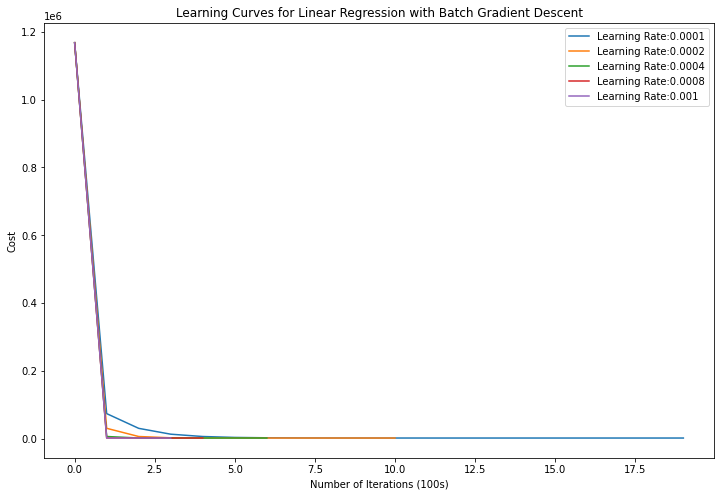

In [15]:
# Plot the learning curves for batch gradient descent with multiple learning rates
plt.figure(figsize = (12, 8))
for i in cost_batch:
    plt.plot(list(i.values())[0], label = 'Learning Rate:{}'.format(list(i.keys())[0]))
plt.xlabel('Number of Iterations (100s)')
plt.ylabel('Cost')    
plt.legend()
plt.title('Learning Curves for Linear Regression with Batch Gradient Descent');

In [16]:
# Linear regression with stochastic gradient descent
theta_stochastic = []
cost_stochastic = []
lr_list_stoc = [0.001, 0.002, 0.004, 0.008, 0.01, 0.02]
for i in lr_list_stoc:
    theta, cost = linear_regression_grad_descent(x_train, y_train, learning_rate = i, grad_desc_type = 'stochastic', verbose = True)
    theta_stochastic.append(theta)
    cost_stochastic.append(cost)

Initial Parameters:
Cost: 1167373.6267494461
Parameter 1: 0.0
Parameter 2: 0.0
*************************************
Iteration: 100
Cost: 983991.2977363432
Parameter 1: 3.9340888116746187
Parameter 2: 2.3756050234529567
*************************************
Iteration: 200
Cost: 809833.0100117957
Parameter 1: 7.9672549453879
Parameter 2: 5.096943696160126
*************************************
Iteration: 300
Cost: 651449.2576040237
Parameter 1: 12.051668374917874
Parameter 2: 8.03739834550146
*************************************
Iteration: 400
Cost: 539950.9671179886
Parameter 1: 15.255239762802066
Parameter 2: 10.518645648698241
*************************************
Iteration: 500
Cost: 452985.3707348824
Parameter 1: 18.11443627603742
Parameter 2: 12.691687141422742
*************************************
Iteration: 600
Cost: 387645.93152512505
Parameter 1: 20.50850712763567
Parameter 2: 14.59798390834612
*************************************
Iteration: 700
Cost: 331312.2094735395
Parame

Iteration: 6200
Cost: 82566.58808200018
Parameter 1: 27.723383481452828
Parameter 2: 48.25921259585237
*************************************
Iteration: 6300
Cost: 81521.34717402092
Parameter 1: 27.552067434218905
Parameter 2: 48.606125192210314
*************************************
Iteration: 6400
Cost: 80516.54286404193
Parameter 1: 27.092594060167183
Parameter 2: 48.792238082553574
*************************************
Iteration: 6500
Cost: 79535.36010270851
Parameter 1: 26.827806684826083
Parameter 2: 49.077527296667206
*************************************
Iteration: 6600
Cost: 78605.00776688306
Parameter 1: 26.90280946187789
Parameter 2: 49.49601494389748
*************************************
Iteration: 6700
Cost: 77435.79163712457
Parameter 1: 26.750089001786463
Parameter 2: 49.91666671699567
*************************************
Iteration: 6800
Cost: 76501.35195956376
Parameter 1: 26.634552157089637
Parameter 2: 50.260514475688105
*************************************
Iteration:

Iteration: 12400
Cost: 37988.70600859245
Parameter 1: 18.407676592131878
Parameter 2: 65.65586505405288
*************************************
Iteration: 12500
Cost: 37492.52652218777
Parameter 1: 18.277049224258572
Parameter 2: 65.89908397430146
*************************************
Iteration: 12600
Cost: 37057.87728558702
Parameter 1: 18.15584650686976
Parameter 2: 66.11006692269125
*************************************
Iteration: 12700
Cost: 36644.914695854044
Parameter 1: 17.823745424522738
Parameter 2: 66.20387142000916
*************************************
Iteration: 12800
Cost: 36190.942634705294
Parameter 1: 17.76687505014085
Parameter 2: 66.4598089924106
*************************************
Iteration: 12900
Cost: 35751.95253106855
Parameter 1: 17.657199277737224
Parameter 2: 66.68489174859708
*************************************
Iteration: 13000
Cost: 35298.7097054592
Parameter 1: 17.646901337781845
Parameter 2: 66.97244069622435
*************************************
Iteratio

Iteration: 18500
Cost: 18513.695122622656
Parameter 1: 12.144785438407975
Parameter 2: 76.98338511508031
*************************************
Iteration: 18600
Cost: 18289.657751346793
Parameter 1: 12.179908655479668
Parameter 2: 77.21056113816728
*************************************
Iteration: 18700
Cost: 18090.623111092413
Parameter 1: 12.098535773782949
Parameter 2: 77.3559974268839
*************************************
Iteration: 18800
Cost: 17873.3458437177
Parameter 1: 12.056882324538375
Parameter 2: 77.54446324478687
*************************************
Iteration: 18900
Cost: 17684.560537039535
Parameter 1: 11.910154465666896
Parameter 2: 77.64416473367963
*************************************
Iteration: 19000
Cost: 17508.63681798297
Parameter 1: 11.746157136559153
Parameter 2: 77.73060467104187
*************************************
Iteration: 19100
Cost: 17306.71676895868
Parameter 1: 11.711917301253997
Parameter 2: 77.90609699435694
*************************************
Iter

Iteration: 24800
Cost: 9600.527455714817
Parameter 1: 7.9850968902593555
Parameter 2: 84.8562237604501
*************************************
Iteration: 24900
Cost: 9508.594743861455
Parameter 1: 7.969400688948515
Parameter 2: 84.97805581326102
*************************************
Iteration: 25000
Cost: 9425.798340330024
Parameter 1: 7.962822064590409
Parameter 2: 85.09521726433776
*************************************
Iteration: 25100
Cost: 9331.545745251737
Parameter 1: 7.921971611990157
Parameter 2: 85.21140089239528
*************************************
Iteration: 25200
Cost: 9251.803113708303
Parameter 1: 7.821568158957272
Parameter 2: 85.27125720285521
*************************************
Iteration: 25300
Cost: 9172.94015009012
Parameter 1: 7.732456823021629
Parameter 2: 85.34039839546848
*************************************
Iteration: 25400
Cost: 9087.12350430821
Parameter 1: 7.667708042579466
Parameter 2: 85.43338985272545
*************************************
Iteration: 2550

Iteration: 31100
Cost: 5726.777244739594
Parameter 1: 5.226564921588248
Parameter 2: 90.03919598052413
*************************************
Iteration: 31200
Cost: 5689.55311005775
Parameter 1: 5.2013402335799706
Parameter 2: 90.10601904499582
*************************************
Iteration: 31300
Cost: 5652.6367664868485
Parameter 1: 5.2312991450921995
Parameter 2: 90.20478377190328
*************************************
Iteration: 31400
Cost: 5614.5181849740475
Parameter 1: 5.198964164568043
Parameter 2: 90.27160457196523
*************************************
Iteration: 31500
Cost: 5576.593441122639
Parameter 1: 5.108340454393722
Parameter 2: 90.30424170484325
*************************************
Iteration: 31600
Cost: 5543.45184039447
Parameter 1: 5.049026818740157
Parameter 2: 90.34792756480168
*************************************
Iteration: 31700
Cost: 5506.482629801046
Parameter 1: 5.0010349425157425
Parameter 2: 90.4065315370613
*************************************
Iteration: 

Iteration: 37200
Cost: 4081.490379543973
Parameter 1: 3.4442801496971973
Parameter 2: 93.35261539943477
*************************************
Iteration: 37300
Cost: 4065.8753591879263
Parameter 1: 3.4119608579579395
Parameter 2: 93.38752017513232
*************************************
Iteration: 37400
Cost: 4042.1642975829127
Parameter 1: 3.3788911525431558
Parameter 2: 93.44748580003943
*************************************
Iteration: 37500
Cost: 4028.5372566417245
Parameter 1: 3.4052987886193633
Parameter 2: 93.50271302929477
*************************************
Iteration: 37600
Cost: 4012.226423614958
Parameter 1: 3.4421545116645693
Parameter 2: 93.58347010473301
*************************************
Iteration: 37700
Cost: 3995.4347819764484
Parameter 1: 3.407526775961683
Parameter 2: 93.61837701415142
*************************************
Iteration: 37800
Cost: 3979.50206247144
Parameter 1: 3.349479568390751
Parameter 2: 93.63652016406792
*************************************
Itera

Iteration: 43200
Cost: 3350.3407315295435
Parameter 1: 2.353604011650514
Parameter 2: 95.60548753826437
*************************************
Iteration: 43300
Cost: 3342.5224487811533
Parameter 1: 2.300953548046354
Parameter 2: 95.60708125541947
*************************************
Iteration: 43400
Cost: 3336.9695957901145
Parameter 1: 2.2962794433698908
Parameter 2: 95.63231658777401
*************************************
Iteration: 43500
Cost: 3328.065771467578
Parameter 1: 2.2227433685220404
Parameter 2: 95.63787875254988
*************************************
Iteration: 43600
Cost: 3321.164112532495
Parameter 1: 2.2146061333610687
Parameter 2: 95.66660152045317
*************************************
Iteration: 43700
Cost: 3310.7522711951606
Parameter 1: 2.1747769466387843
Parameter 2: 95.70029981115871
*************************************
Iteration: 43800
Cost: 3304.4857503462017
Parameter 1: 2.208405199604745
Parameter 2: 95.74432644856466
*************************************
Iter

Iteration: 49200
Cost: 3020.8178146609507
Parameter 1: 1.4784402566122805
Parameter 2: 97.03114633458648
*************************************
Iteration: 49300
Cost: 3017.3375566958553
Parameter 1: 1.4569341043254893
Parameter 2: 97.04757938091885
*************************************
Iteration: 49400
Cost: 3013.623432639805
Parameter 1: 1.5137871742976172
Parameter 2: 97.10101216956866
*************************************
Iteration: 49500
Cost: 3010.8867907167114
Parameter 1: 1.5364124600221782
Parameter 2: 97.14661650470698
*************************************
Iteration: 49600
Cost: 3006.71454634543
Parameter 1: 1.4796543181526556
Parameter 2: 97.1310828001438
*************************************
Iteration: 49700
Cost: 3005.223032032473
Parameter 1: 1.4702133143035958
Parameter 2: 97.13662839307992
*************************************
Iteration: 49800
Cost: 2999.8796082674544
Parameter 1: 1.4423799298794215
Parameter 2: 97.16128104342924
*************************************
Iter

Iteration: 5100
Cost: 50212.32103406632
Parameter 1: 20.870832756374778
Parameter 2: 59.908295882142895
*************************************
Iteration: 5200
Cost: 49023.73829993903
Parameter 1: 20.90109985528193
Parameter 2: 60.52615871581675
*************************************
Iteration: 5300
Cost: 47591.74930493489
Parameter 1: 20.662876367563072
Parameter 2: 61.186033971314785
*************************************
Iteration: 5400
Cost: 46471.62959417854
Parameter 1: 20.520966080228458
Parameter 2: 61.74015979387462
*************************************
Iteration: 5500
Cost: 45366.69637168071
Parameter 1: 20.37578673308124
Parameter 2: 62.30149917346647
*************************************
Iteration: 5600
Cost: 44225.26866431973
Parameter 1: 20.041601883752133
Parameter 2: 62.772785120269255
*************************************
Iteration: 5700
Cost: 43182.60368058003
Parameter 1: 19.404301138350952
Parameter 2: 63.05276452217552
*************************************
Iteration: 5

Iteration: 11100
Cost: 12447.20972818838
Parameter 1: 9.663794292226154
Parameter 2: 82.05150544915254
*************************************
Iteration: 11200
Cost: 12204.554756423993
Parameter 1: 9.513702071164653
Parameter 2: 82.2606209401652
*************************************
Iteration: 11300
Cost: 11985.263956252395
Parameter 1: 9.185681445270221
Parameter 2: 82.36434140645646
*************************************
Iteration: 11400
Cost: 11726.57765919582
Parameter 1: 9.105792597573137
Parameter 2: 82.63334651485083
*************************************
Iteration: 11500
Cost: 11502.13822799052
Parameter 1: 9.021371811243394
Parameter 2: 82.86610627701214
*************************************
Iteration: 11600
Cost: 11246.375405071074
Parameter 1: 8.939951637950937
Parameter 2: 83.14484958917153
*************************************
Iteration: 11700
Cost: 11040.261239203664
Parameter 1: 8.934784286182257
Parameter 2: 83.41463986156809
*************************************
Iteration:

Iteration: 17200
Cost: 4678.41185827886
Parameter 1: 4.19879375783092
Parameter 2: 92.00178212322074
*************************************
Iteration: 17300
Cost: 4634.621957549241
Parameter 1: 4.221772848452513
Parameter 2: 92.1390092877011
*************************************
Iteration: 17400
Cost: 4581.601043226497
Parameter 1: 4.2007145572464655
Parameter 2: 92.28536039338414
*************************************
Iteration: 17500
Cost: 4535.896743700693
Parameter 1: 4.066917052476599
Parameter 2: 92.32224714670411
*************************************
Iteration: 17600
Cost: 4497.575217381587
Parameter 1: 3.9706038406793094
Parameter 2: 92.37900556540224
*************************************
Iteration: 17700
Cost: 4444.847274966995
Parameter 1: 3.909856132995487
Parameter 2: 92.49638895597981
*************************************
Iteration: 17800
Cost: 4402.313184827236
Parameter 1: 3.796058601379849
Parameter 2: 92.5692367207677
*************************************
Iteration: 1790

Iteration: 23700
Cost: 3097.662943103029
Parameter 1: 1.801131799886998
Parameter 2: 96.71074436278475
*************************************
Iteration: 23800
Cost: 3088.681175691897
Parameter 1: 1.749114828361028
Parameter 2: 96.72241770076513
*************************************
Iteration: 23900
Cost: 3080.418810871203
Parameter 1: 1.6586958473558766
Parameter 2: 96.71918216315909
*************************************
Iteration: 24000
Cost: 3069.082299656413
Parameter 1: 1.5799617913901889
Parameter 2: 96.76452873326053
*************************************
Iteration: 24100
Cost: 3060.597323239087
Parameter 1: 1.531687109555044
Parameter 2: 96.80649219210649
*************************************
Iteration: 24200
Cost: 3049.694453404475
Parameter 1: 1.57139420040756
Parameter 2: 96.87720792305802
*************************************
Iteration: 24300
Cost: 3045.319174160184
Parameter 1: 1.6449714374004352
Parameter 2: 96.96447749822806
*************************************
Iteration: 

Iteration: 29500
Cost: 2824.650562335508
Parameter 1: 0.7364451392990684
Parameter 2: 98.47459139264463
*************************************
Iteration: 29600
Cost: 2824.6334618809924
Parameter 1: 0.6335816899357197
Parameter 2: 98.47697265538865
*************************************
Iteration: 29700
Cost: 2820.1622561359395
Parameter 1: 0.6391015041329159
Parameter 2: 98.51765745673744
*************************************
Iteration: 29800
Cost: 2817.188234296981
Parameter 1: 0.6620974131912264
Parameter 2: 98.54821931691565
*************************************
Iteration: 29900
Cost: 2817.315830624493
Parameter 1: 0.7520015673488578
Parameter 2: 98.62268820191794
*************************************
Iteration: 30000
Cost: 2815.8661438921895
Parameter 1: 0.741999618304354
Parameter 2: 98.63635808875142
*************************************
Iteration: 30100
Cost: 2814.743662048407
Parameter 1: 0.7339577856625229
Parameter 2: 98.6465353430219
*************************************
Itera

Iteration: 35500
Cost: 2769.9478788273
Parameter 1: 0.3631680337731465
Parameter 2: 99.44230270084041
*************************************
Iteration: 35600
Cost: 2765.8655561172873
Parameter 1: 0.320985142763062
Parameter 2: 99.41346062808714
*************************************
Iteration: 35700
Cost: 2765.3962892204772
Parameter 1: 0.3136937484790318
Parameter 2: 99.40777620095926
*************************************
Iteration: 35800
Cost: 2763.566980841027
Parameter 1: 0.24164011390536358
Parameter 2: 99.37946908877176
*************************************
Iteration: 35900
Cost: 2766.250047204952
Parameter 1: 0.16811023911480646
Parameter 2: 99.36293731351685
*************************************
Iteration: 36000
Cost: 2766.3836258712354
Parameter 1: 0.13650394096362067
Parameter 2: 99.38793796605947
*************************************
Iteration: 36100
Cost: 2761.890080225916
Parameter 1: 0.2251594852320951
Parameter 2: 99.4234565844414
*************************************
Iter

Iteration: 42000
Cost: 2756.285199260941
Parameter 1: 0.13313323430465973
Parameter 2: 99.81662877165795
*************************************
Iteration: 42100
Cost: 2753.0142960050007
Parameter 1: -0.002993902745357267
Parameter 2: 99.76959040266266
*************************************
Iteration: 42200
Cost: 2753.577629813756
Parameter 1: -0.012406292318588037
Parameter 2: 99.76293585269848
*************************************
Iteration: 42300
Cost: 2755.6516393076827
Parameter 1: -0.06059021828239921
Parameter 2: 99.77506173993328
*************************************
Iteration: 42400
Cost: 2751.821266031657
Parameter 1: 0.029764547674197332
Parameter 2: 99.80209675872858
*************************************
Iteration: 42500
Cost: 2757.45808993667
Parameter 1: 0.12396122838465239
Parameter 2: 99.87939951328822
*************************************
Iteration: 42600
Cost: 2751.8758354631796
Parameter 1: 0.04695960950501922
Parameter 2: 99.82456900166959
*****************************

Iteration: 400
Cost: 168478.6768754234
Parameter 1: 32.47157375095996
Parameter 2: 26.297613965794927
*************************************
Iteration: 500
Cost: 149592.81132865587
Parameter 1: 33.92505289666643
Parameter 2: 29.370840472461023
*************************************
Iteration: 600
Cost: 138999.06082985728
Parameter 1: 34.191818284156774
Parameter 2: 31.828439732235385
*************************************
Iteration: 700
Cost: 130112.469770597
Parameter 1: 34.57740709068246
Parameter 2: 34.39619191421003
*************************************
Iteration: 800
Cost: 124974.42646792888
Parameter 1: 32.258311423109085
Parameter 2: 35.43347325240745
*************************************
Iteration: 900
Cost: 118899.35581509091
Parameter 1: 31.657024833171707
Parameter 2: 37.06623365364329
*************************************
Iteration: 1000
Cost: 112329.12293056512
Parameter 1: 32.146800466490866
Parameter 2: 39.18719660049494
*************************************
Iteration: 1100

Iteration: 6400
Cost: 9036.047018275869
Parameter 1: 7.553126862742281
Parameter 2: 85.45940220095478
*************************************
Iteration: 6500
Cost: 8742.849100666834
Parameter 1: 7.154736554547697
Parameter 2: 85.75854043181857
*************************************
Iteration: 6600
Cost: 8424.556456366718
Parameter 1: 7.253668918699287
Parameter 2: 86.22106634426845
*************************************
Iteration: 6700
Cost: 8050.610955191236
Parameter 1: 7.032179824721925
Parameter 2: 86.6972216765177
*************************************
Iteration: 6800
Cost: 7818.38568523954
Parameter 1: 6.998161701409274
Parameter 2: 87.07198495349392
*************************************
Iteration: 6900
Cost: 7556.406279973367
Parameter 1: 6.888391825969361
Parameter 2: 87.47941157064716
*************************************
Iteration: 7000
Cost: 7298.600284669959
Parameter 1: 6.552346160706755
Parameter 2: 87.70719698954346
*************************************
Iteration: 7100
Cost: 

Iteration: 12700
Cost: 2976.515834084046
Parameter 1: 1.3179191473223224
Parameter 2: 97.28438962403705
*************************************
Iteration: 12800
Cost: 2961.7706739119153
Parameter 1: 1.2308639376830366
Parameter 2: 97.37406638699424
*************************************
Iteration: 12900
Cost: 2950.969384885626
Parameter 1: 1.1713952255568718
Parameter 2: 97.44568166645455
*************************************
Iteration: 13000
Cost: 2941.4295285912535
Parameter 1: 1.1078864172315244
Parameter 2: 97.51489738386302
*************************************
Iteration: 13100
Cost: 2933.7253649365457
Parameter 1: 1.313965874142978
Parameter 2: 97.69293260401886
*************************************
Iteration: 13200
Cost: 2938.8439679434164
Parameter 1: 1.3613112097817122
Parameter 2: 97.84435124037006
*************************************
Iteration: 13300
Cost: 2909.024846606695
Parameter 1: 1.1509634035064165
Parameter 2: 97.76156825907537
*************************************
Ite

Iteration: 18800
Cost: 2765.4615232827687
Parameter 1: 0.279495645863313
Parameter 2: 99.63472997391776
*************************************
Iteration: 18900
Cost: 2758.0473866926714
Parameter 1: 0.19891711322824354
Parameter 2: 99.58587002533764
*************************************
Iteration: 19000
Cost: 2758.712951371571
Parameter 1: 0.14193420517506006
Parameter 2: 99.51935257661708
*************************************
Iteration: 19100
Cost: 2757.4647064425894
Parameter 1: 0.09071258548811692
Parameter 2: 99.57820366776998
*************************************
Iteration: 19200
Cost: 2767.065688413799
Parameter 1: -0.01222367127985341
Parameter 2: 99.54728058498931
*************************************
Iteration: 19300
Cost: 2759.229851153447
Parameter 1: 0.031423528672700846
Parameter 2: 99.59991283023693
*************************************
Iteration: 19400
Cost: 2760.6229244423307
Parameter 1: 0.2166662136969911
Parameter 2: 99.6991848603075
***********************************

Iteration: 24800
Cost: 2761.5829258073186
Parameter 1: -0.22750369883753682
Parameter 2: 99.94526636148971
*************************************
Iteration: 24900
Cost: 2751.429513172551
Parameter 1: -0.13159918891675537
Parameter 2: 99.98506409927337
*************************************
Iteration: 25000
Cost: 2763.749251972684
Parameter 1: 0.07895756098844019
Parameter 2: 100.09272915807654
*************************************
Iteration: 25100
Cost: 2759.3833106521706
Parameter 1: 0.05460733613340309
Parameter 2: 100.07339270566813
*************************************
Iteration: 25200
Cost: 2760.8468542688056
Parameter 1: 0.07680012152047563
Parameter 2: 100.05333832628659
*************************************
Iteration: 25300
Cost: 2753.6386408900116
Parameter 1: -0.12777224880656576
Parameter 2: 99.91536997172851
*************************************
Iteration: 25400
Cost: 2763.4102737627463
Parameter 1: -0.2399309435146732
Parameter 2: 99.94251282777066
**************************

Iteration: 30700
Cost: 2752.8964810785387
Parameter 1: -0.03965564885323382
Parameter 2: 100.1169292764189
*************************************
Iteration: 30800
Cost: 2755.5220598748183
Parameter 1: -0.004820389367808315
Parameter 2: 100.11547025538451
*************************************
Iteration: 30900
Cost: 2751.1906180407204
Parameter 1: -0.1502956423873594
Parameter 2: 100.02664904648617
*************************************
Iteration: 31000
Cost: 2772.6538714181706
Parameter 1: -0.3256425371883765
Parameter 2: 99.99250779834175
*************************************
Iteration: 31100
Cost: 2761.745885829495
Parameter 1: -0.27814762890360684
Parameter 2: 100.03769184191907
*************************************
Iteration: 31200
Cost: 2749.8596078948312
Parameter 1: -0.13146950500074428
Parameter 2: 100.08621803813017
*************************************
Iteration: 31300
Cost: 2763.40286514406
Parameter 1: 0.02338253039628424
Parameter 2: 100.19230662279043
***********************

Parameter 2: 100.12184189996894
*************************************
Iteration: 36500
Cost: 2750.0540153438337
Parameter 1: -0.13669580713753915
Parameter 2: 100.06847855067677
*************************************
Iteration: 36600
Cost: 2771.6712607316326
Parameter 1: -0.3193234539705302
Parameter 2: 99.99108967859631
*************************************
Iteration: 36700
Cost: 2760.907601277084
Parameter 1: -0.28701014403269504
Parameter 2: 100.06825562938305
*************************************
Iteration: 36800
Cost: 2750.2745893280135
Parameter 1: -0.09681890588227672
Parameter 2: 100.11448926679473
*************************************
Iteration: 36900
Cost: 2778.759066304237
Parameter 1: 0.08131812011889057
Parameter 2: 100.25392271425422
*************************************
Iteration: 37000
Cost: 2752.888992948253
Parameter 1: -0.05224490273793421
Parameter 2: 100.13933708122903
*************************************
Iteration: 37100
Cost: 2753.9322973970243
Parameter 1: -0.02

Iteration: 42500
Cost: 2772.740030146496
Parameter 1: 0.05341863145540051
Parameter 2: 100.2460910479235
*************************************
Iteration: 42600
Cost: 2749.861896879715
Parameter 1: -0.12410716224251425
Parameter 2: 100.113058833469
*************************************
Iteration: 42700
Cost: 2758.5181205948606
Parameter 1: 0.013834755076452356
Parameter 2: 100.13695926621332
*************************************
Iteration: 42800
Cost: 2757.2071334724264
Parameter 1: -0.24187950115865353
Parameter 2: 100.04359093662647
*************************************
Iteration: 42900
Cost: 2753.3302604650594
Parameter 1: -0.20410731916914823
Parameter 2: 100.05778848511869
*************************************
Iteration: 43000
Cost: 2762.667309542885
Parameter 1: -0.2983389410482986
Parameter 2: 100.06373122407186
*************************************
Iteration: 43100
Cost: 2750.133130610379
Parameter 1: -0.10503977024387481
Parameter 2: 100.1173154086056
**************************

Iteration: 48500
Cost: 2753.4796945338667
Parameter 1: -0.2160818351131241
Parameter 2: 100.077598813385
*************************************
Iteration: 48600
Cost: 2761.7774451722817
Parameter 1: -0.2842836590793073
Parameter 2: 100.04924090105428
*************************************
Iteration: 48700
Cost: 2755.8446449205003
Parameter 1: -0.03061407008574078
Parameter 2: 100.16890505328894
*************************************
Iteration: 48800
Cost: 2774.362282544482
Parameter 1: 0.055917905527114
Parameter 2: 100.25784532580052
*************************************
Iteration: 48900
Cost: 2749.837267419117
Parameter 1: -0.13226481522138486
Parameter 2: 100.09808989933309
*************************************
Iteration: 49000
Cost: 2749.9712919866543
Parameter 1: -0.09055076867555269
Parameter 2: 100.07845564277531
*************************************
Iteration: 49100
Cost: 2751.210884593295
Parameter 1: -0.1816524900406949
Parameter 2: 100.08701648312655
***************************

Iteration: 4900
Cost: 3794.906152243315
Parameter 1: 3.0821528881579074
Parameter 2: 94.1402306644961
*************************************
Iteration: 5000
Cost: 3712.674052021201
Parameter 1: 2.912701032064247
Parameter 2: 94.35739546365168
*************************************
Iteration: 5100
Cost: 3649.8455674490474
Parameter 1: 2.480388154317403
Parameter 2: 94.55071417239317
*************************************
Iteration: 5200
Cost: 3539.9148374514443
Parameter 1: 2.5115563026153547
Parameter 2: 94.86947694477173
*************************************
Iteration: 5300
Cost: 3420.239215211874
Parameter 1: 2.2873012129297714
Parameter 2: 95.27871331065714
*************************************
Iteration: 5400
Cost: 3374.2100563497916
Parameter 1: 2.461628192980982
Parameter 2: 95.58881974054005
*************************************
Iteration: 5500
Cost: 3372.9951490698586
Parameter 1: 2.5575620507962356
Parameter 2: 95.9873416582658
*************************************
Iteration: 560

Iteration: 11500
Cost: 2751.7438466810404
Parameter 1: -0.09861438170676533
Parameter 2: 99.9231489541731
*************************************
Iteration: 11600
Cost: 2755.62608212781
Parameter 1: -0.17941088519190082
Parameter 2: 99.95878378806319
*************************************
Iteration: 11700
Cost: 2770.2181193784127
Parameter 1: 0.13260120155428418
Parameter 2: 100.06954859485299
*************************************
Iteration: 11800
Cost: 2826.0768201676697
Parameter 1: 0.26982750156459473
Parameter 2: 100.24037554439502
*************************************
Iteration: 11900
Cost: 2751.604538267642
Parameter 1: -0.10695321471734157
Parameter 2: 99.94011003265962
*************************************
Iteration: 12000
Cost: 2751.2896882667683
Parameter 1: -0.06720912131060297
Parameter 2: 99.89729497355408
*************************************
Iteration: 12100
Cost: 2758.3981727474898
Parameter 1: -0.18648889383031209
Parameter 2: 99.9213585625018
****************************

Iteration: 18100
Cost: 2757.9874800587622
Parameter 1: -0.03365168665700495
Parameter 2: 100.21279533797257
*************************************
Iteration: 18200
Cost: 2749.8536310516447
Parameter 1: -0.13351677473776935
Parameter 2: 100.09414599137114
*************************************
Iteration: 18300
Cost: 2753.534662142824
Parameter 1: -0.16503675786910496
Parameter 2: 99.97991918745123
*************************************
Iteration: 18400
Cost: 2758.865443450334
Parameter 1: -0.2638938980732193
Parameter 2: 100.05647117591207
*************************************
Iteration: 18500
Cost: 2773.900726321582
Parameter 1: -0.35408083354232794
Parameter 2: 100.03417496375857
*************************************
Iteration: 18600
Cost: 2750.2071839797945
Parameter 1: -0.17431585768932178
Parameter 2: 100.14911407654137
*************************************
Iteration: 18700
Cost: 2768.019932737954
Parameter 1: 0.03606026433756971
Parameter 2: 100.2262854877977
************************

Iteration: 24400
Cost: 2769.853019747281
Parameter 1: 0.05385837821930363
Parameter 2: 100.2148203648191
*************************************
Iteration: 24500
Cost: 2758.7293322412975
Parameter 1: 0.01088039677252245
Parameter 2: 100.1459746904713
*************************************
Iteration: 24600
Cost: 2764.5251485066947
Parameter 1: -0.24563405572984462
Parameter 2: 99.93827130465411
*************************************
Iteration: 24700
Cost: 2783.22624460091
Parameter 1: -0.3942908703403215
Parameter 2: 100.02152463218171
*************************************
Iteration: 24800
Cost: 2771.9183871487935
Parameter 1: -0.36329696800933764
Parameter 2: 100.07435841775578
*************************************
Iteration: 24900
Cost: 2750.007992997851
Parameter 1: -0.1548594107583
Parameter 2: 100.15294337415034
*************************************
Iteration: 25000
Cost: 2804.012626993018
Parameter 1: 0.16134222620620742
Parameter 2: 100.30402410651256
********************************

Iteration: 30400
Cost: 2769.802614465936
Parameter 1: -0.35495819350723745
Parameter 2: 100.08240849172695
*************************************
Iteration: 30500
Cost: 2752.5260506615427
Parameter 1: -0.0776705103997784
Parameter 2: 100.17256390548692
*************************************
Iteration: 30600
Cost: 2800.0555818408766
Parameter 1: 0.13792246131111555
Parameter 2: 100.31939528537086
*************************************
Iteration: 30700
Cost: 2750.4797543422637
Parameter 1: -0.0950101326080814
Parameter 2: 100.12401088253417
*************************************
Iteration: 30800
Cost: 2757.64508956314
Parameter 1: 0.006163888616625879
Parameter 2: 100.13601600936178
*************************************
Iteration: 30900
Cost: 2760.4085633787327
Parameter 1: -0.2396387376847094
Parameter 2: 99.98478016586351
*************************************
Iteration: 31000
Cost: 2820.110660454023
Parameter 1: -0.5041594042518298
Parameter 2: 99.96419659952238
***************************

Iteration: 36200
Cost: 2844.0633834269474
Parameter 1: 0.23774819669787597
Parameter 2: 100.39650223397909
*************************************
Iteration: 36300
Cost: 2752.0463005606507
Parameter 1: -0.06808631860465984
Parameter 2: 100.14212389364184
*************************************
Iteration: 36400
Cost: 2753.6908905528408
Parameter 1: -0.025351986684338627
Parameter 2: 100.11168962940285
*************************************
Iteration: 36500
Cost: 2752.5923531597705
Parameter 1: -0.18298867190509902
Parameter 2: 100.03836660852818
*************************************
Iteration: 36600
Cost: 2808.9685636017675
Parameter 1: -0.4528274363229792
Parameter 2: 99.9371149107827
*************************************
Iteration: 36700
Cost: 2766.100974788921
Parameter 1: -0.34666634898513166
Parameter 2: 100.11309963404831
*************************************
Iteration: 36800
Cost: 2760.124053626101
Parameter 1: 0.0011433361623486848
Parameter 2: 100.18577122844906
********************

Iteration: 42000
Cost: 2766.9736854871826
Parameter 1: 0.07438885877412263
Parameter 2: 100.14361127003374
*************************************
Iteration: 42100
Cost: 2777.865868867827
Parameter 1: -0.3568280466829334
Parameter 2: 99.99912870972267
*************************************
Iteration: 42200
Cost: 2757.4252622046574
Parameter 1: -0.24247024946741697
Parameter 2: 100.04059887172595
*************************************
Iteration: 42300
Cost: 2764.3929326025927
Parameter 1: -0.3370896015106196
Parameter 2: 100.11741000898697
*************************************
Iteration: 42400
Cost: 2758.023451936222
Parameter 1: -0.015471275165067298
Parameter 2: 100.18174362560993
*************************************
Iteration: 42500
Cost: 2808.782783261088
Parameter 1: 0.14903197340543284
Parameter 2: 100.35721019595691
*************************************
Iteration: 42600
Cost: 2754.1180143934544
Parameter 1: -0.22500106046627488
Parameter 2: 100.07839849455621
***********************

Iteration: 47700
Cost: 2760.204710615777
Parameter 1: -0.27349267641450914
Parameter 2: 100.05275699456594
*************************************
Iteration: 47800
Cost: 2756.0567976597113
Parameter 1: -0.25456715593588736
Parameter 2: 100.09265615793541
*************************************
Iteration: 47900
Cost: 2768.3952820738336
Parameter 1: -0.3407583820235866
Parameter 2: 100.07105403743996
*************************************
Iteration: 48000
Cost: 2779.952524441707
Parameter 1: 0.08432414052338288
Parameter 2: 100.25926753820612
*************************************
Iteration: 48100
Cost: 2809.3235052632153
Parameter 1: 0.14327125286545142
Parameter 2: 100.37087449867626
*************************************
Iteration: 48200
Cost: 2751.3798870677488
Parameter 1: -0.18570581011106893
Parameter 2: 100.08778645947547
*************************************
Iteration: 48300
Cost: 2750.5115442415577
Parameter 1: -0.13127787064498098
Parameter 2: 100.02519054455908
*********************

Iteration: 3400
Cost: 4969.935044046682
Parameter 1: 4.855800447705061
Parameter 2: 91.90501204255223
*************************************
Iteration: 3500
Cost: 4606.70908543515
Parameter 1: 4.221887482819754
Parameter 2: 92.22462681666256
*************************************
Iteration: 3600
Cost: 4407.756521427644
Parameter 1: 3.72902592975113
Parameter 2: 92.5422772536025
*************************************
Iteration: 3700
Cost: 4270.055545654079
Parameter 1: 3.2393148668604757
Parameter 2: 92.90347094290891
*************************************
Iteration: 3800
Cost: 4028.879043708813
Parameter 1: 3.373395267933639
Parameter 2: 93.48654618604029
*************************************
Iteration: 3900
Cost: 3811.815672346649
Parameter 1: 3.000529944967658
Parameter 2: 94.05069008446107
*************************************
Iteration: 4000
Cost: 3712.729405667308
Parameter 1: 3.0747092992542684
Parameter 2: 94.49384736224229
*************************************
Iteration: 4100
Cost:

Iteration: 9600
Cost: 2774.0009500662973
Parameter 1: 0.1440788599202158
Parameter 2: 100.08927403515307
*************************************
Iteration: 9700
Cost: 2841.859068096928
Parameter 1: 0.30138582311842244
Parameter 2: 100.26813606601176
*************************************
Iteration: 9800
Cost: 2764.6832815368653
Parameter 1: -0.22780749658097482
Parameter 2: 99.90443769866526
*************************************
Iteration: 9900
Cost: 2752.1433160574798
Parameter 1: 0.02301475564944295
Parameter 2: 99.95712822956729
*************************************
Iteration: 10000
Cost: 2761.3147971935687
Parameter 1: -0.22847989015630601
Parameter 2: 99.95087544872206
*************************************
Iteration: 10100
Cost: 2750.021617524845
Parameter 1: -0.09975001061855704
Parameter 2: 100.00930325028754
*************************************
Iteration: 10200
Cost: 2754.867968903052
Parameter 1: -0.23188670707186368
Parameter 2: 100.0736005944911
*******************************

Iteration: 15700
Cost: 2757.940539758455
Parameter 1: -0.27780174591213025
Parameter 2: 100.10180104926302
*************************************
Iteration: 15800
Cost: 2759.115396306227
Parameter 1: -0.286014071304987
Parameter 2: 100.09674694996674
*************************************
Iteration: 15900
Cost: 2813.1350248136023
Parameter 1: 0.19194614364437151
Parameter 2: 100.30712776263287
*************************************
Iteration: 16000
Cost: 2790.5726545382004
Parameter 1: 0.08123635566036541
Parameter 2: 100.3515066974979
*************************************
Iteration: 16100
Cost: 2755.3202530241306
Parameter 1: -0.22923186320234135
Parameter 2: 100.05779561428571
*************************************
Iteration: 16200
Cost: 2753.318794575304
Parameter 1: -0.15953783527190052
Parameter 2: 99.97578077345844
*************************************
Iteration: 16300
Cost: 2760.0585316220304
Parameter 1: -0.2778875867370303
Parameter 2: 100.0638949253736
***************************

Iteration: 21700
Cost: 2752.4382441367043
Parameter 1: -0.04439021249105854
Parameter 2: 100.11221617007578
*************************************
Iteration: 21800
Cost: 2766.791304078233
Parameter 1: -0.23982630214541717
Parameter 2: 99.90008683355934
*************************************
Iteration: 21900
Cost: 2779.4827289587565
Parameter 1: -0.38612881372114044
Parameter 2: 100.04050107488852
*************************************
Iteration: 22000
Cost: 2778.8199376295574
Parameter 1: -0.3911600222483002
Parameter 2: 100.05694104369586
*************************************
Iteration: 22100
Cost: 2754.767015458019
Parameter 1: -0.062497237504780194
Parameter 2: 100.20164345656167
*************************************
Iteration: 22200
Cost: 2806.795103639846
Parameter 1: 0.15762153884096014
Parameter 2: 100.32907260588897
*************************************
Iteration: 22300
Cost: 2754.527261235329
Parameter 1: -0.04015971422247051
Parameter 2: 100.15825748397084
**********************

Iteration: 27500
Cost: 2794.197126496073
Parameter 1: -0.44463534605299615
Parameter 2: 100.02773582460927
*************************************
Iteration: 27600
Cost: 2782.4535773436887
Parameter 1: -0.41105078828667285
Parameter 2: 100.06169861387505
*************************************
Iteration: 27700
Cost: 2750.157697469537
Parameter 1: -0.13880698616645323
Parameter 2: 100.16282234346059
*************************************
Iteration: 27800
Cost: 2825.030641789175
Parameter 1: 0.20526467664502285
Parameter 2: 100.35345878820831
*************************************
Iteration: 27900
Cost: 2754.7034939259684
Parameter 1: -0.0475187359314556
Parameter 2: 100.17492417830692
*************************************
Iteration: 28000
Cost: 2773.570531042367
Parameter 1: 0.0901845749139808
Parameter 2: 100.1877095326096
*************************************
Iteration: 28100
Cost: 2765.499583453081
Parameter 1: -0.25399695763896407
Parameter 2: 99.94113727087934
***************************

Iteration: 34000
Cost: 2772.568388296204
Parameter 1: 0.04894666865418271
Parameter 2: 100.2523073348189
*************************************
Iteration: 34100
Cost: 2872.8151059599622
Parameter 1: 0.2945639943394354
Parameter 2: 100.42967415824344
*************************************
Iteration: 34200
Cost: 2750.2165663950263
Parameter 1: -0.0972942094856
Parameter 2: 100.11128412723399
*************************************
Iteration: 34300
Cost: 2769.1991496642886
Parameter 1: 0.08937645224249764
Parameter 2: 100.1417124631694
*************************************
Iteration: 34400
Cost: 2764.610207537785
Parameter 1: -0.26227598195116403
Parameter 2: 99.96762089304981
*************************************
Iteration: 34500
Cost: 2817.585591083175
Parameter 1: -0.48371465150171666
Parameter 2: 99.94061981234115
*************************************
Iteration: 34600
Cost: 2796.5130242506684
Parameter 1: -0.47362934928087513
Parameter 2: 100.06702436309453
*******************************

Iteration: 40600
Cost: 2761.11134725897
Parameter 1: 0.04630227783812944
Parameter 2: 100.1173682121607
*************************************
Iteration: 40700
Cost: 2777.7353176647894
Parameter 1: -0.36053348715060507
Parameter 2: 100.00754828656888
*************************************
Iteration: 40800
Cost: 2753.493437416228
Parameter 1: -0.20612599490501296
Parameter 2: 100.0572518444865
*************************************
Iteration: 40900
Cost: 2760.4030014739537
Parameter 1: -0.3241990778098768
Parameter 2: 100.15461296388114
*************************************
Iteration: 41000
Cost: 2761.6229398743744
Parameter 1: 0.001433190596613407
Parameter 2: 100.20714456815647
*************************************
Iteration: 41100
Cost: 2817.735434462111
Parameter 1: 0.17203507297677093
Parameter 2: 100.37096979388376
*************************************
Iteration: 41200
Cost: 2754.4706253246177
Parameter 1: -0.22833531860315054
Parameter 2: 100.07614660279263
*************************

Iteration: 46600
Cost: 2780.4045459845192
Parameter 1: 0.08225387320112001
Parameter 2: 100.26699306026116
*************************************
Iteration: 46700
Cost: 2841.762139693203
Parameter 1: 0.2065631350289393
Parameter 2: 100.44068508573943
*************************************
Iteration: 46800
Cost: 2754.54986863685
Parameter 1: -0.22697356157832374
Parameter 2: 100.07141972156425
*************************************
Iteration: 46900
Cost: 2752.390281802404
Parameter 1: -0.1659034745890479
Parameter 2: 100.01279898983753
*************************************
Iteration: 47000
Cost: 2759.9889419550464
Parameter 1: -0.2733617114897934
Parameter 2: 100.05605196140029
*************************************
Iteration: 47100
Cost: 2751.5539310735967
Parameter 1: -0.2010945594154812
Parameter 2: 100.11349592502732
*************************************
Iteration: 47200
Cost: 2767.7986895330505
Parameter 1: -0.34851234994689173
Parameter 2: 100.09430428474279
**************************

Iteration: 2700
Cost: 3077.58141266577
Parameter 1: 1.6230513689144674
Parameter 2: 98.22224226082034
*************************************
Iteration: 2800
Cost: 2865.313138381493
Parameter 1: 0.866203562156958
Parameter 2: 98.07969398893428
*************************************
Iteration: 2900
Cost: 2853.202892366718
Parameter 1: 0.9643482957237217
Parameter 2: 98.30585517582767
*************************************
Iteration: 3000
Cost: 2884.2611403827113
Parameter 1: 0.3548738313918496
Parameter 2: 98.37727289262946
*************************************
Iteration: 3100
Cost: 2807.644255039986
Parameter 1: 0.4651751633551493
Parameter 2: 98.70829560031227
*************************************
Iteration: 3200
Cost: 2779.193154790451
Parameter 1: 0.29164565435257306
Parameter 2: 99.10395609891839
*************************************
Iteration: 3300
Cost: 2835.6400026991096
Parameter 1: 0.7310039758507876
Parameter 2: 99.26599275400733
*************************************
Iteration: 3

Iteration: 9100
Cost: 2855.1356865836183
Parameter 1: -0.5810627733652038
Parameter 2: 99.91849540888776
*************************************
Iteration: 9200
Cost: 2751.5870395719685
Parameter 1: -0.013470624738568172
Parameter 2: 100.01937532737969
*************************************
Iteration: 9300
Cost: 2752.9111083047887
Parameter 1: -0.24583451402202716
Parameter 2: 100.16179634523628
*************************************
Iteration: 9400
Cost: 2764.0052661553136
Parameter 1: -0.0034692297303263106
Parameter 2: 100.24752373815714
*************************************
Iteration: 9500
Cost: 2753.1607865076567
Parameter 1: -0.3002007943466417
Parameter 2: 100.32273985170515
*************************************
Iteration: 9600
Cost: 2806.679172120495
Parameter 1: 0.16574364205835163
Parameter 2: 100.31365989052901
*************************************
Iteration: 9700
Cost: 2864.429913558107
Parameter 1: 0.23190392996172335
Parameter 2: 100.50420381916142
***************************

Iteration: 15700
Cost: 2754.1425250971097
Parameter 1: -0.28501343675852286
Parameter 2: 100.21503405418495
*************************************
Iteration: 15800
Cost: 2755.5348214537757
Parameter 1: -0.2918565386743822
Parameter 2: 100.18811778246032
*************************************
Iteration: 15900
Cost: 2891.001236506764
Parameter 1: 0.3395089006364406
Parameter 2: 100.426085258365
*************************************
Iteration: 16000
Cost: 2769.7886793232956
Parameter 1: -0.06215475709822251
Parameter 2: 100.41031265255401
*************************************
Iteration: 16100
Cost: 2768.452186262794
Parameter 1: -0.3139967804086374
Parameter 2: 100.01766484071918
*************************************
Iteration: 16200
Cost: 2773.6281225974253
Parameter 1: -0.24678202536544117
Parameter 2: 99.8390212806704
*************************************
Iteration: 16300
Cost: 2759.3861504584893
Parameter 1: -0.3024264531048234
Parameter 2: 100.12621954606536
***************************

Iteration: 22000
Cost: 2795.207088850372
Parameter 1: -0.49786253128617847
Parameter 2: 100.12662834966089
*************************************
Iteration: 22100
Cost: 2797.329104698122
Parameter 1: 0.10224847445349718
Parameter 2: 100.36376776817308
*************************************
Iteration: 22200
Cost: 2850.5760793533236
Parameter 1: 0.22960132492376265
Parameter 2: 100.44337932965196
*************************************
Iteration: 22300
Cost: 2754.1222228329198
Parameter 1: -0.21795759055186759
Parameter 2: 100.06408702625961
*************************************
Iteration: 22400
Cost: 2774.110847151056
Parameter 1: 0.11978787498991983
Parameter 2: 100.13756874696037
*************************************
Iteration: 22500
Cost: 2812.557152944077
Parameter 1: -0.36277615146442554
Parameter 2: 99.74913898857181
*************************************
Iteration: 22600
Cost: 2826.29154040116
Parameter 1: -0.57496275772786
Parameter 2: 100.06525870196731
*****************************

Iteration: 28000
Cost: 2824.6749071982595
Parameter 1: 0.259689111395249
Parameter 2: 100.25125911285893
*************************************
Iteration: 28100
Cost: 2781.0389772106987
Parameter 1: -0.29414692398405545
Parameter 2: 99.85400224386578
*************************************
Iteration: 28200
Cost: 2948.371548093296
Parameter 1: -0.7806463167254949
Parameter 2: 99.90761701163707
*************************************
Iteration: 28300
Cost: 2765.8748890051584
Parameter 1: -0.38785519298434146
Parameter 2: 100.20525413706129
*************************************
Iteration: 28400
Cost: 2757.0864915392785
Parameter 1: -0.07936437199165465
Parameter 2: 100.27291220904594
*************************************
Iteration: 28500
Cost: 2818.456828539375
Parameter 1: 0.16636689909998675
Parameter 2: 100.38533466735349
*************************************
Iteration: 28600
Cost: 2753.3583249056146
Parameter 1: -0.2262698216136805
Parameter 2: 100.10237402406742
**************************

Iteration: 33700
Cost: 2751.6072870255693
Parameter 1: -0.10661209411208712
Parameter 2: 99.93950585263738
*************************************
Iteration: 33800
Cost: 2886.1590913133396
Parameter 1: -0.6458071749071964
Parameter 2: 99.89723532433322
*************************************
Iteration: 33900
Cost: 2829.3370960086345
Parameter 1: -0.6369062102551806
Parameter 2: 100.17268515842987
*************************************
Iteration: 34000
Cost: 2836.258115124959
Parameter 1: 0.2108801224876602
Parameter 2: 100.40458066801952
*************************************
Iteration: 34100
Cost: 2979.286034668749
Parameter 1: 0.4221177262724334
Parameter 2: 100.59788850135797
*************************************
Iteration: 34200
Cost: 2754.1070500026617
Parameter 1: -0.2073865393685804
Parameter 2: 100.0437011048479
*************************************
Iteration: 34300
Cost: 2796.462787845431
Parameter 1: 0.21939198025789802
Parameter 2: 100.14191594638548
******************************

Iteration: 39500
Cost: 2773.810587627352
Parameter 1: -0.4579938270658632
Parameter 2: 100.25406580317863
*************************************
Iteration: 39600
Cost: 2778.395514375235
Parameter 1: 0.05491130432236166
Parameter 2: 100.29754366880353
*************************************
Iteration: 39700
Cost: 2891.5527762820348
Parameter 1: 0.29551938612530104
Parameter 2: 100.50778731390992
*************************************
Iteration: 39800
Cost: 2767.925293939662
Parameter 1: -0.3301730849086585
Parameter 2: 100.05577686563528
*************************************
Iteration: 39900
Cost: 2762.6662935190925
Parameter 1: 0.08289994672377327
Parameter 2: 100.0693412325671
*************************************
Iteration: 40000
Cost: 2787.2854744735596
Parameter 1: -0.40749169492553194
Parameter 2: 100.01167736466664
*************************************
Iteration: 40100
Cost: 2749.8399322174696
Parameter 1: -0.12950026530591363
Parameter 2: 100.1110263553436
**************************

Iteration: 45800
Cost: 2753.067359957478
Parameter 1: -0.29985070214466314
Parameter 2: 100.33625266445307
*************************************
Iteration: 45900
Cost: 2828.463203012345
Parameter 1: 0.19889950417578686
Parameter 2: 100.38411129674836
*************************************
Iteration: 46000
Cost: 2795.9475260537392
Parameter 1: 0.06247003553207704
Parameter 2: 100.42294185806965
*************************************
Iteration: 46100
Cost: 2776.720212847553
Parameter 1: -0.3628288050455195
Parameter 2: 100.02207214770542
*************************************
Iteration: 46200
Cost: 2752.175221483404
Parameter 1: -0.12796582119039582
Parameter 2: 99.95448964309448
*************************************
Iteration: 46300
Cost: 2760.2343235310027
Parameter 1: -0.30769847121587957
Parameter 2: 100.12212602641145
*************************************
Iteration: 46400
Cost: 2760.714653919301
Parameter 1: -0.054005183015918
Parameter 2: 100.28848061716545
***************************

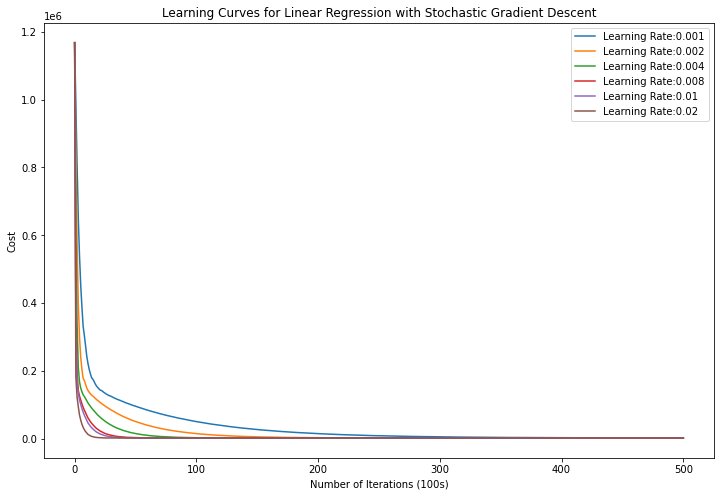

In [17]:
# Plot the learning curves for stochastic gradient descent with multiple learning rates
plt.figure(figsize = (12, 8))
for i in cost_stochastic:
    plt.plot(list(i.values())[0], label = 'Learning Rate:{}'.format(list(i.keys())[0]))
plt.xlabel('Number of Iterations (100s)')
plt.ylabel('Cost')    
plt.legend()
plt.title('Learning Curves for Linear Regression with Stochastic Gradient Descent');

In [18]:
# Linear regression using batch gradient descent optimization algorithm
y_train_pred_batch = y_calc(theta_batch[-1], x_train)
y_test_pred_batch = y_calc(theta_batch[-1], x_test)
train_r_square_batch = r_square_calc(y_train, y_train_pred_batch)
test_r_square_batch = r_square_calc(y_test, y_test_pred_batch)
print('Summary of Linear Regression with Batch Gradient Descent Algorithm:')
print('Train R-square:{}'.format(train_r_square_batch))
print('Test R-square:{}'.format(test_r_square_batch))
print('Learning rate:{}'.format(list(cost_batch[-1].keys())[0]))
print('Cost at convergence:{}'.format(list(cost_batch[-1].values())[-1][-1]))
print('Parameter 1:{}'.format(theta_batch[-1][0][0]))
print('Parameter 2:{}'.format(theta_batch[-1][1][0]))

Summary of Linear Regression with Batch Gradient Descent Algorithm:
Train R-square:0.9907
Test R-square:0.9888
Learning rate:0.001
Cost at convergence:2749.779580449932
Parameter 1:-0.10723642463648027
Parameter 2:100.06558395688818


In [19]:
# Linear regression using stochastic gradient descent optimization algorithm
y_train_pred_stoc = y_calc(theta_stochastic[-1], x_train)
y_test_pred_stoc = y_calc(theta_stochastic[-1], x_test)
train_r_square_stoc = r_square_calc(y_train, y_train_pred_stoc)
test_r_square_stoc = r_square_calc(y_test, y_test_pred_stoc)
print('Summary of Linear Regression with Stochastic Gradient Descent Algorithm:')
print('Train R-square:{}'.format(train_r_square_stoc))
print('Test R-square:{}'.format(test_r_square_stoc))
print('Learning rate:{}'.format(list(cost_stochastic[-1].keys())[0]))
print('Cost at convergence:{}'.format(list(cost_stochastic[-1].values())[-1][-1]))
print('Parameter 1:{}'.format(theta_stochastic[-1][0][0]))
print('Parameter 2:{}'.format(theta_stochastic[-1][1][0]))

Summary of Linear Regression with Stochastic Gradient Descent Algorithm:
Train R-square:0.99069
Test R-square:0.98874
Learning rate:0.02
Cost at convergence:2754.2313626450887
Parameter 1:-0.2808476938055445
Parameter 2:100.20108821067099


In [20]:
# Linear regression with Normal equation
theta_normal_eq = linear_regression_normal_eq(x_train, y_train)
y_train_pred_norm = y_calc(theta_normal_eq, x_train)
y_test_pred_norm = y_calc(theta_normal_eq, x_test)
train_r_square_norm = r_square_calc(y_train, y_train_pred_norm)
test_r_square_norm = r_square_calc(y_test, y_test_pred_norm)
print('Summary of Linear Regression with Normal Equation:')
print('Train R-square:{}'.format(train_r_square_norm))
print('Test R-square:{}'.format(test_r_square_norm))
h_norm = hypothesis_calc(theta_normal_eq, x_train)
cost_norm = cost_calc(h_norm, y_train)
print('Cost:{}'.format(cost_norm))
print('Parameter 1:{}'.format(theta_normal_eq[0][0]))
print('Parameter 2:{}'.format(theta_normal_eq[1][0]))

Summary of Linear Regression with Normal Equation:
Train R-square:0.9907
Test R-square:0.9888
Cost:2749.7795803539466
Parameter 1:-0.10726546430082973
Parameter 2:100.06563818563009


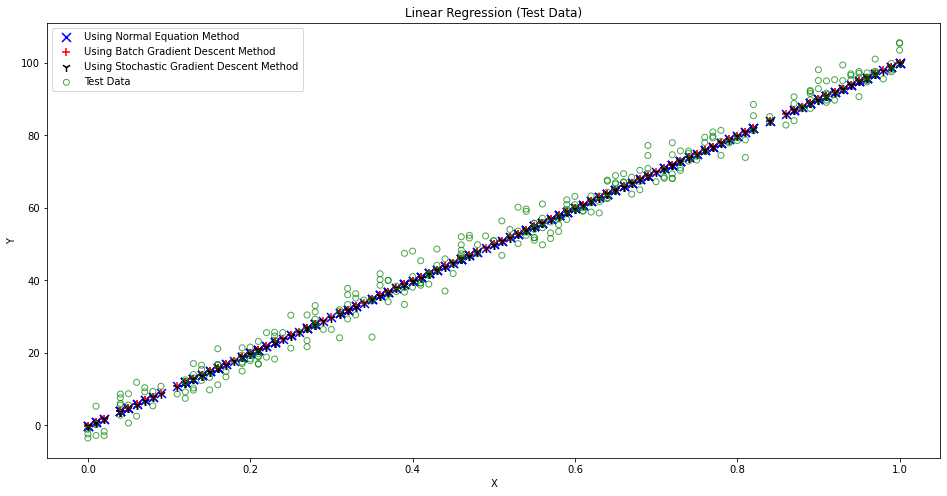

In [21]:
# Plotting of test data
plt.figure(figsize = (16, 8))
plt.scatter(x_test[:,1], y_test_pred_norm, label = 'Using Normal Equation Method', marker = 'x', s = 80, color = 'blue')
plt.scatter(x_test[:,1], y_test_pred_batch, label = 'Using Batch Gradient Descent Method', marker = '+', s = 80, color = 'red')
plt.scatter(x_test[:,1], y_test_pred_stoc, label = 'Using Stochastic Gradient Descent Method', marker = '1', s = 80, color = 'black')
plt.scatter(x_test[:,1], y_test, label = 'Test Data', facecolors = 'none', edgecolors = 'green', alpha = 0.7)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression (Test Data)');

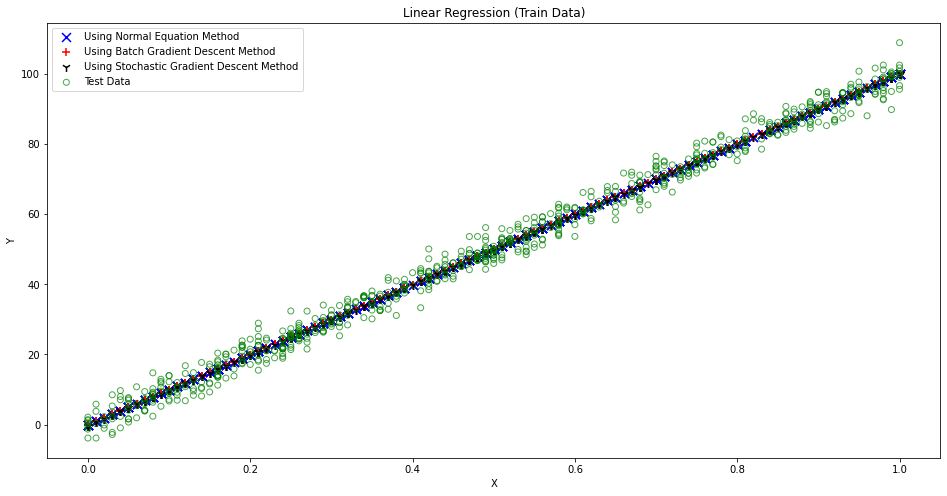

In [22]:
# Plotting of train data
plt.figure(figsize = (16, 8))
plt.scatter(x_train[:,1], y_train_pred_norm, label = 'Using Normal Equation Method', marker = 'x', s = 80, color = 'blue')
plt.scatter(x_train[:,1], y_train_pred_batch, label = 'Using Batch Gradient Descent Method', marker = '+', s = 80, color = 'red')
plt.scatter(x_train[:,1], y_train_pred_stoc, label = 'Using Stochastic Gradient Descent Method', marker = '1', s = 80, color = 'black')
plt.scatter(x_train[:,1], y_train, label = 'Test Data', facecolors = 'none', edgecolors = 'green', alpha = 0.7)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression (Train Data)');